## testing hyperparams for varied movie length 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from sklearn import preprocessing
import torch
from torch.utils.data import DataLoader
import copy
from torch import nn
%matplotlib inline
import matplotlib.pyplot as plt
from dnaDataloader import expermentDataloader
from dnaDataloader import addData
from dnaModelUtil import printStats
from dnaModelUtil import train
from scipy import stats as st
import os
from datetime import datetime

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
batch_size = 100
num_workers = 0
device

device(type='cuda', index=1)

In [2]:
folder = '/home/khood/GitHub/SNN-DNA-project/Prepocessing/sorted/1800_nM_AR_5000'

In [3]:
data = expermentDataloader(
    f"{folder}/index.csv",
    f"{folder}", 
    # length=36000 # 30 min half movie length 
    length=12000 # 10 min movie length 
)
rawData = [d for d in data]

featIn 12000


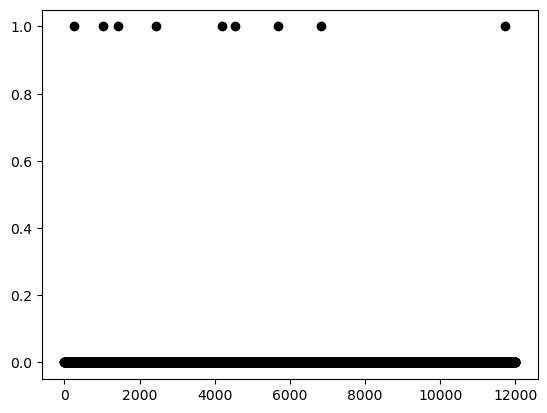

In [4]:
plt.plot(list(range(len(rawData[0][0]))), rawData[0][0], 'o', color='black')
featIn = len(rawData[0][0])
print(f"featIn {featIn}")

In [5]:
len(rawData)

888

In [6]:
featIn = len(rawData[0][0])
trainValidData = []
testData = []
addData(testData, trainValidData, rawData, rhsSize=300)


np.random.shuffle(trainValidData)
trainData = []
validData = []
addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

trainDataset = DataLoader(trainData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True) 
validDataset = DataLoader(validData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
testDataset = DataLoader(testData, batch_size=len(testData), shuffle=True, num_workers=num_workers, pin_memory=True)
print(f"Training dataset size: {len(trainData)}")
print(f"Valid dataset size: {len(validData)}")
print(f"Testing dataset size: {len(testData)}")
print(f"Total: {len(trainData) + len(validData) + len(testData)}")
print(f"number train batches:{len(trainDataset)}")
print(f"number valid batches:{len(validDataset)}")
print(f"number test batches:{len(testDataset)}")

featIn

Training dataset size: 459
Valid dataset size: 229
Testing dataset size: 200
Total: 888
number train batches:5
number valid batches:3
number test batches:1


12000

In [7]:
size = 700
size

700

In [8]:
model = nn.Sequential(
          nn.Linear(featIn,size),
          nn.ReLU(),
          nn.Dropout(p=0.2),
          nn.Linear(size,size),
          nn.ReLU(),
          nn.Dropout(p=0.2),
          nn.Linear(size,size),
          nn.ReLU(),
          nn.Linear(size,1),
        )
model.to(device)
MSE = nn.MSELoss(reduction = 'sum')
adam = torch.optim.Adam(model.parameters(),lr=0.000001, weight_decay=1e-5)

em = 20
epochs = 10000
losses = []
accs = []
print("training...")
for e in range(epochs): 
    avgLossTrain = []
    currentAccTrain = []
    model.train()
    for i, (inputs, targets) in enumerate(trainDataset):
        inputs, targets= inputs.float().to(device), targets.float().to(device)
        outputs = model(inputs)
        loss = MSE(outputs, targets)
        avgLossTrain.append(float(loss.item()))
        adam.zero_grad()
        loss.backward()
        adam.step()
        totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
        totalCorrect = totalCorrect.item()
        currentAccTrain.append(float(totalCorrect/len(targets)))
        
    avgLoss = []
    currentAcc = []
    model.eval()
    for i, (inputs, targets) in enumerate(validDataset):
        inputs, targets= inputs.float().to(device), targets.float().to(device)
        outputs = model(inputs)
        loss = MSE(outputs, targets)
        outputPlot = outputs.clone().detach().cpu().numpy()
        targetsPlot = targets.clone().detach().cpu().numpy()
        avgLoss.append(float(loss.clone().detach().cpu().numpy()))
        totalCorrect = torch.sum(torch.isclose(outputs.int(), targets.int(), atol=em))
        totalCorrect = totalCorrect.clone().detach().cpu().numpy()
        currentAcc.append(float(totalCorrect/len(targets)))
        print(f"\
        epoch: {e}/{epochs}\t \
        Train Loss:{'%.4f' % (np.sum(avgLossTrain)/len(avgLossTrain))} Valid Loss:{'%.4f' % (np.sum(avgLoss)/len(avgLoss))}\t \
        Train accuracy:{'%.4f' % (np.sum(currentAccTrain)/len(currentAccTrain))} Valid accuracy:{'%.4f' % (np.sum(currentAcc)/len(currentAcc))} \
        ",end="\x1b\r")
    accs.append(float(np.sum(currentAcc)/len(currentAcc)))
    losses.append(float(np.sum(avgLoss)/len(avgLoss)))

training...


30000

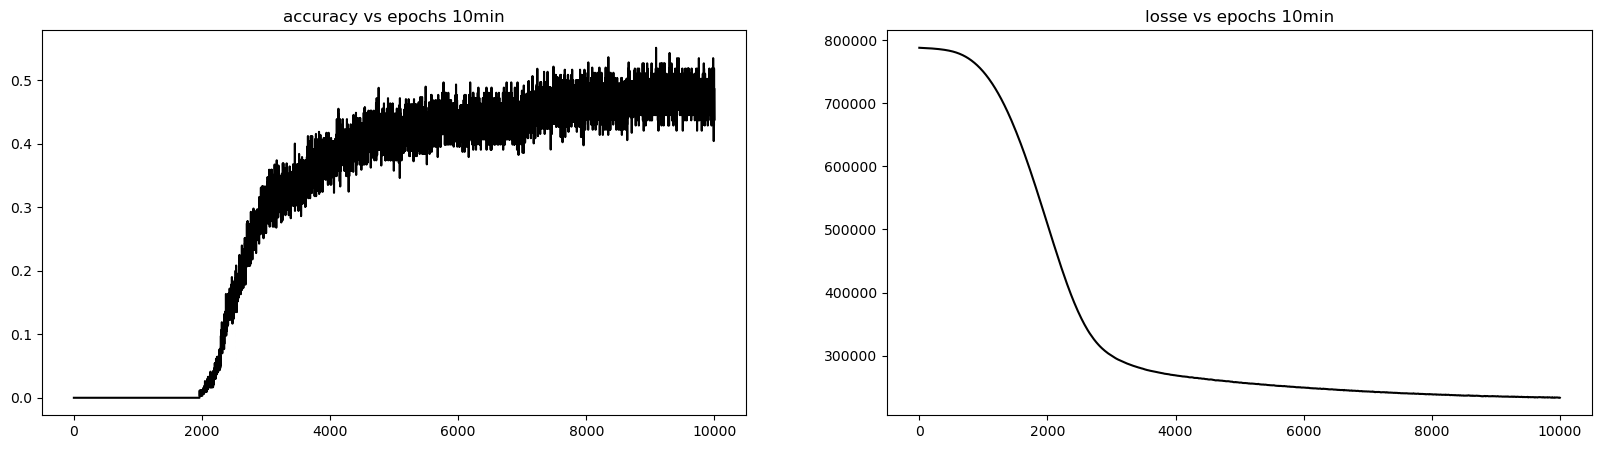

In [11]:
defultePlotSize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [20, 5]
plt.subplot(1, 2, 1)
plt.title('accuracy vs epochs 10min')
plt.plot(list(range(len(accs[:]))), accs[:], '-', color='black', )
plt.subplot(1, 2, 2)
plt.title('losse vs epochs 10min')
plt.plot(list(range(len(losses)))[:], losses[:], '-', color='black')
plt.rcParams['figure.figsize'] = defultePlotSize
epochs*len(validDataset)

In [9]:
title = "trying varied movie length"
dt_string = datetime.now().strftime("%d.%m.%Y_%H-%M-%S-%f")
modelPath = f"./Models/{title.replace(' ', '_')}_{dt_string}.pt"
torch.save(model.state_dict(),modelPath)
print(f"saved to {modelPath}")

saved to ./Models/trying_varied_movie_length_31.05.2023_23-14-33-374077.pt


In [ ]:
data = expermentDataloader(
    f"{folder}/index.csv",
    f"{folder}", 
    # length=36000 # 30 min half movie length 
    length=12000 # 10 min movie length 
)
rawData = [d for d in data]
featIn = len(rawData[0][0])
featIn = len(rawData[0][0])
trainValidData = []
testData = []
addData(testData, trainValidData, rawData, rhsSize=300)


np.random.shuffle(trainValidData)
trainData = []
validData = []
addData(trainData, validData, trainValidData, rhsSize=int(len(trainValidData)*(1/3)))

trainDataset = DataLoader(trainData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True) 
validDataset = DataLoader(validData, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
testDataset = DataLoader(testData, batch_size=len(testData), shuffle=True, num_workers=num_workers, pin_memory=True)
print(f"Training dataset size: {len(trainData)}")
print(f"Valid dataset size: {len(validData)}")
print(f"Testing dataset size: {len(testData)}")
print(f"Total: {len(trainData) + len(validData) + len(testData)}")
print(f"number train batches:{len(trainDataset)}")
print(f"number valid batches:{len(validDataset)}")
print(f"number test batches:{len(testDataset)}")

train()